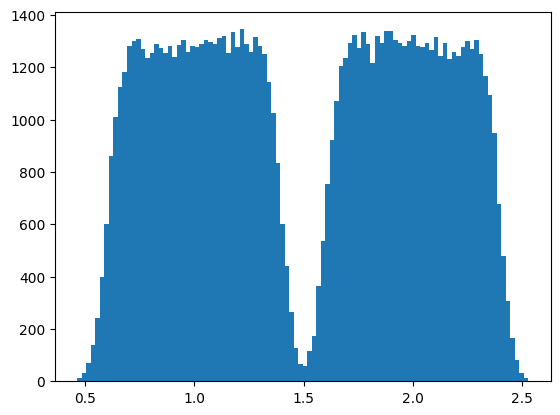

In [1]:
from sensitivity.stochastic import sample, Gaussian, Uniform, Discrete, seed
import matplotlib.pyplot as plt


def my_function(a, b, c=0, d=0):
    return a + b + c + d


seed(0)
samples = sample(
    my_function,
    [Gaussian(10, 0.05), Discrete([1, 2])],
    {"c": Uniform(-0.4, 0.4), "d": -10},
    n=100000,
)

plt.hist(samples, 100)
plt.show()